In [1]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot
from runner import Runner

In [2]:
serp = Runner('template', './sss2')

In [3]:
serp.run(0.39)

Running with fuel radius: 0.39000, clad radius: 0.45000, pitch: 0.63000


array([1.3625 , 0.00142])

In [4]:
fuel = np.linspace(0.1, 0.5, 10)

In [5]:
k, u = [], []

In [6]:
for f in fuel:
    res = serp.run(f)
    k.append(res[0])
    u.append(res[1])

Running with fuel radius: 0.10000, clad radius: 0.16000, pitch: 0.63000
Running with fuel radius: 0.14444, clad radius: 0.20444, pitch: 0.63000
Running with fuel radius: 0.18889, clad radius: 0.24889, pitch: 0.63000
Running with fuel radius: 0.23333, clad radius: 0.29333, pitch: 0.63000
Running with fuel radius: 0.27778, clad radius: 0.33778, pitch: 0.63000
Running with fuel radius: 0.32222, clad radius: 0.38222, pitch: 0.63000
Running with fuel radius: 0.36667, clad radius: 0.42667, pitch: 0.63000
Running with fuel radius: 0.41111, clad radius: 0.47111, pitch: 0.63000
Running with fuel radius: 0.45556, clad radius: 0.51556, pitch: 0.63000
Running with fuel radius: 0.50000, clad radius: 0.56000, pitch: 0.63000


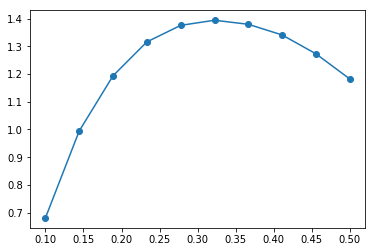

In [9]:
pyplot.plot(fuel, k, 'o-')

In [10]:
def minKeffFunc(x, *args):
    runner = args[0]
    keff, unc = runner.run(x[0])
    print(x[0], keff)
    return -keff

In [12]:
serp._verbose = False

In [13]:
minimize(minKeffFunc, (0.20, ), args=(serp, ),
         method='TNC', bounds=((0.1, 0.55,), ))

0.2 1.23271
0.2 1.23039
0.20000001 1.23374
0.2000000085681677 1.23132
0.2000000085681677 1.23439
0.20000001856816768 1.23046
0.20000000394276946 1.23188
0.20000000394276946 1.23367
0.20000001394276945 1.2315
0.20000000197138473 1.23164
0.20000000197138473 1.23239
0.20000001197138473 1.23447
0.20000000098569237 1.23281
0.20000000098569237 1.23265
0.20000001098569237 1.23345
0.20000000098569237 1.23439
0.20000000098569237 1.23319
0.20000001098569237 1.23123


     fun: -1.23439
     jac: array([196000.])
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 5
     nit: 1
  status: 2
 success: True
       x: array([0.2])